In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from amstools import *

In [3]:
from tensorpotential.calculator import grace_fm, TPCalculator

[tensorpotential] Info: Environment variable TF_USE_LEGACY_KERAS is automatically set to '1'.


2026-02-28 10:03:34.740916: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1772269414.752026 1176418 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1772269414.755376 1176418 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1772269414.764285 1176418 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772269414.764295 1176418 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772269414.764296 1176418 computation_placer.cc:177] computation placer alr

In [4]:
from amstools.thermodynamics import run_convex_hull_calculation, plot_convex_hull

In [5]:
from amstools.sources import fetch_structures, fetch_mp_reference_df

In [6]:
from ase.build import bulk

In [7]:
from pyace.asecalc import PyGRACEFSCalculator

In [8]:
calc=TPCalculator("seed/1/final_model/")

2026-02-28 10:03:42.238148: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
# calc=PyGRACEFSCalculator("seed/1/saved_model.yaml")

In [10]:
cache_dir='../../1-AlLi-GRACE-2LAYER/0-data/AlLi_Materials_Project'

In [11]:
ref_df=fetch_mp_reference_df(['Al','Li'], 
                             # mp_api_key='XXXXX',  ## get from https://next-gen.materialsproject.org/api                         
                             max_atoms=32,
                             cache_dir=cache_dir)

In [12]:
ref_df

,name,ase_atoms,e_per_atom,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-134,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.000000,0.000000
1,Al__mp-2647008,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.032078,0.032078
2,Al__mp-1183144,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.010481,0.010481
3,Li__mp-51,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.001672,0.001672
4,Li__mp-135,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.009651,0.009651
5,Li__mp-976411,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.005889,0.005889
6,Li__mp-1018134,"(Atom('Li', [np.float64(4.618009551014942), np...",NaN,0.000000,0.000000
7,Li__mp-1103107,"(Atom('Li', [np.float64(1.379696372079909), np...",NaN,0.055379,0.055379
8,Li__mp-1063005,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.015671,0.015671
9,Li__mp-10173,"(Atom('Li', [np.float64(-1.1807313597921131e-0...",NaN,0.005988,0.005988


In [13]:
struct_dict=fetch_structures(['Al','Li'], 
                             # mp_api_key=MP_API_KEY, 
                             max_atoms=32,
                             cache_dir=cache_dir)

In [14]:
pipeline_dict={}

In [15]:
df, pipeline_dict=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc, pipeline_dict=pipeline_dict)

2026-02-28 10:03:43,462 - root - INFO - Processing structure 'Al__mp-134'
2026-02-28 10:03:43,463 - root - INFO - =======================
2026-02-28 10:03:43,463 - root - INFO - Step: optimization
Processing: optimized_structure (1 atom(s)):   0%|          | 0/1 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1772269423.709501 1176418 service.cc:152] XLA service 0x115ee970 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1772269423.709533 1176418 service.cc:160]   StreamExecutor device (0): Host, Default Version
2026-02-28 10:03:43.896792: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1772269425.230393 1176418 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
Processing: optimized_s

Structure dataset: multiple unique compositions found, trying to construct convex hull


In [16]:
df

,name,ase_atoms,energy,energy_per_atom,equilibrium_volume,equilibrium_bulk_modulus,comp_dict,NUMBER_OF_ATOMS,comp_tuple,n_Al,c_Al,n_Li,c_Li,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-134,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",-3.757237,-3.757237,16.509894,86.465861,{'Al': 1},1,"((Al, 1.0),)",1,1.000000,0,0.000000,0.000000,0.000000e+00
1,Al__mp-2647008,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",-7.450844,-3.725422,33.013472,92.660764,{'Al': 2},2,"((Al, 1.0),)",2,1.000000,0,0.000000,0.031815,3.181497e-02
2,Al__mp-1183144,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",-14.951023,-3.737756,66.440997,83.498359,{'Al': 4},4,"((Al, 1.0),)",4,1.000000,0,0.000000,0.019482,1.948156e-02
3,Li__mp-51,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",-1.914186,-1.914186,20.556271,17.720931,{'Li': 1},1,"((Li, 1.0),)",0,0.000000,1,1.000000,0.001086,1.086076e-03
4,Li__mp-135,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",-1.911986,-1.911986,20.405870,13.296887,{'Li': 1},1,"((Li, 1.0),)",0,0.000000,1,1.000000,0.003286,3.286238e-03
5,Li__mp-976411,"(Atom('Li', [np.float64(5.17285314277074e-22),...",-7.658457,-1.914614,81.000137,15.269666,{'Li': 4},4,"((Li, 1.0),)",0,0.000000,4,1.000000,0.000658,6.578836e-04
6,Li__mp-1018134,"(Atom('Li', [np.float64(4.606412885982087), np...",-5.745817,-1.915272,60.626509,16.279800,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,0.000000,0.000000e+00
7,Li__mp-1103107,"(Atom('Li', [np.float64(1.2278532790340855), n...",-22.758577,-1.896548,243.203379,16.276232,{'Li': 12},12,"((Li, 1.0),)",0,0.000000,12,1.000000,0.018724,1.872414e-02
8,Li__mp-1063005,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",-5.704068,-1.901356,61.954079,12.725441,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,0.013916,1.391616e-02
9,Li__mp-10173,"(Atom('Li', [np.float64(-9.683870728290585e-07...",-3.829346,-1.914673,40.512133,15.554036,{'Li': 2},2,"((Li, 1.0),)",0,0.000000,2,1.000000,0.000599,5.992770e-04


In [17]:
calc_ft=TPCalculator("../3a-finetuning/seed/1/final_model/")

In [18]:
pipeline_dict_ft = {}

In [19]:
df_ft, pipeline_dict_fm=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc_ft, pipeline_dict=pipeline_dict_ft)

2026-02-28 10:04:01,236 - root - INFO - Processing structure 'Al__mp-134'
2026-02-28 10:04:01,237 - root - INFO - =======================
2026-02-28 10:04:01,237 - root - INFO - Step: optimization
Processing: optimized_structure (1 atom(s)): 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]
2026-02-28 10:04:03,341 - root - INFO - Step status: finished
2026-02-28 10:04:03,341 - root - INFO - =======================
2026-02-28 10:04:03,341 - root - INFO - =======================
2026-02-28 10:04:03,341 - root - INFO - Step: murnaghan
Processing: strain_1_1 (1 atom(s)): 100%|██████████| 11/11 [00:00<00:00, 35.85it/s]              
2026-02-28 10:04:03,651 - root - INFO - Job is done
2026-02-28 10:04:03,652 - root - INFO - Step status: finished
2026-02-28 10:04:03,652 - root - INFO - =======================
2026-02-28 10:04:03,652 - root - INFO - Processing structure 'Al__mp-2647008'
2026-02-28 10:04:03,653 - root - INFO - =======================
2026-02-28 10:04:03,653 - root - INFO - Step: op

Structure dataset: multiple unique compositions found, trying to construct convex hull


{('Al',
  'Li'): <Axes: title={'center': 'Convex Hull: Al-Li'}, xlabel='Concentration of Li', ylabel='Formation energy (eV/atom)'>}

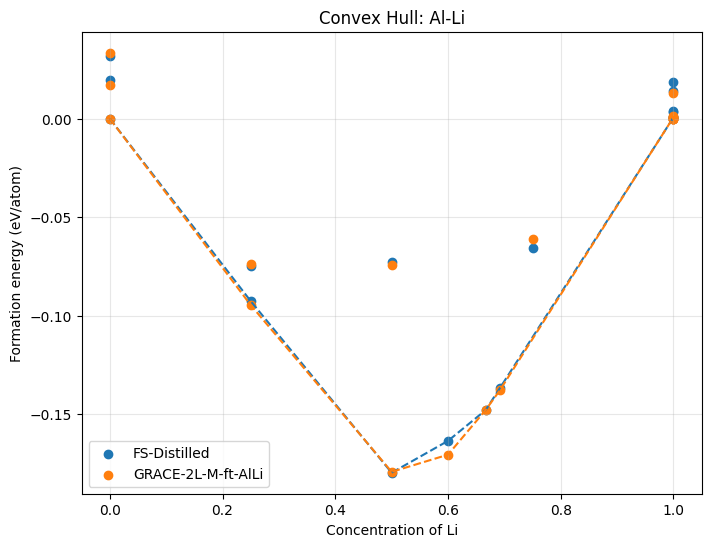

In [21]:
plot_convex_hull({
    "FS-Distilled":df,
    "GRACE-2L-M-ft-AlLi":df_ft, 
    # "MatProj":ref_df
})

# Property validation

In [56]:
from amstools import *

In [57]:
ref_df

,name,ase_atoms,e_per_atom,e_formation_per_atom,e_chull_dist_per_atom,comp_dict,NUMBER_OF_ATOMS,comp_tuple,n_Al,c_Al,n_Li,c_Li
0,Al__mp-134,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.000000,0.000000,{'Al': 1},1,"((Al, 1.0),)",1,1.000000,0,0.000000
1,Al__mp-2647008,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.032078,0.032078,{'Al': 2},2,"((Al, 1.0),)",2,1.000000,0,0.000000
2,Al__mp-1183144,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.010481,0.010481,{'Al': 4},4,"((Al, 1.0),)",4,1.000000,0,0.000000
3,Li__mp-51,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.001672,0.001672,{'Li': 1},1,"((Li, 1.0),)",0,0.000000,1,1.000000
4,Li__mp-135,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.009651,0.009651,{'Li': 1},1,"((Li, 1.0),)",0,0.000000,1,1.000000
5,Li__mp-976411,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.005889,0.005889,{'Li': 4},4,"((Li, 1.0),)",0,0.000000,4,1.000000
6,Li__mp-1018134,"(Atom('Li', [np.float64(4.618009551014942), np...",NaN,0.000000,0.000000,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000
7,Li__mp-1103107,"(Atom('Li', [np.float64(1.379696372079909), np...",NaN,0.055379,0.055379,{'Li': 12},12,"((Li, 1.0),)",0,0.000000,12,1.000000
8,Li__mp-1063005,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.015671,0.015671,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000
9,Li__mp-10173,"(Atom('Li', [np.float64(-1.1807313597921131e-0...",NaN,0.005988,0.005988,{'Li': 2},2,"((Li, 1.0),)",0,0.000000,2,1.000000


In [59]:
from ase.build import bulk

In [60]:
Al_fcc = bulk("Al")

In [84]:
Al_fcc = bulk("Li")

In [86]:
Al_fcc = ref_df.query("name=='LiAl__mp-1067'")['ase_atoms'].values[0]

In [89]:
pipe = ( NearestNeighboursExpansionCalculator() + StepwiseOptimizer() +  MurnaghanCalculator() + ElasticMatrixCalculator() + PhonopyCalculator() 
         # + DefectFormationCalculator(defect_type='vacancy')
       )

In [90]:
pipe.run(init_structure=Al_fcc, engine=calc)

2026-02-28 10:55:44,204 - root - INFO - =======================
2026-02-28 10:55:44,205 - root - INFO - Step: energy_nn_distance
Processing: nndist_4_9500 (4 atom(s)): 100%|██████████| 60/60 [00:00<00:00, 575.24it/s]
2026-02-28 10:55:44,319 - root - INFO - Job is done
2026-02-28 10:55:44,320 - root - INFO - Step status: finished
2026-02-28 10:55:44,320 - root - INFO - =======================
2026-02-28 10:55:44,320 - root - INFO - =======================
2026-02-28 10:55:44,320 - root - INFO - Step: optimization
Processing: optimized_structure (4 atom(s)): 100%|██████████| 1/1 [00:00<00:00, 74.59it/s]
2026-02-28 10:55:44,338 - root - INFO - Step status: finished
2026-02-28 10:55:44,338 - root - INFO - =======================
2026-02-28 10:55:44,338 - root - INFO - =======================
2026-02-28 10:55:44,339 - root - INFO - Step: murnaghan
Processing: strain_1_1 (4 atom(s)): 100%|██████████| 11/11 [00:00<00:00, 511.87it/s]     
2026-02-28 10:55:44,363 - root - INFO - Job is done
202

      Step     Time          Energy          fmax
BFGS:    0 10:55:44      -12.055137        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:44      -12.052764        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:44      -12.054545        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:44      -12.054518        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:44      -12.052680        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:44      -12.054745        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:44      -12.055042        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:44      -12.055031        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:44      -12.054725        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:44      -12.054

Processing: supercell_phonon_1 (108 atom(s)): 100%|██████████| 2/2 [00:00<00:00, 28.77it/s]
2026-02-28 10:55:47,449 - root - INFO - Job is done
2026-02-28 10:55:47,449 - root - INFO - Step status: finished
2026-02-28 10:55:47,450 - root - INFO - =======================


In [91]:
pipe_ft = pipe.rerun_for(engine=calc_ft)

2026-02-28 10:55:47,454 - root - INFO - =======================
2026-02-28 10:55:47,454 - root - INFO - Step: energy_nn_distance
Processing: nndist_4_9500 (4 atom(s)): 100%|██████████| 60/60 [00:02<00:00, 26.34it/s]
2026-02-28 10:55:49,743 - root - INFO - Job is done
2026-02-28 10:55:49,744 - root - INFO - Step status: finished
2026-02-28 10:55:49,744 - root - INFO - =======================
2026-02-28 10:55:49,744 - root - INFO - =======================
2026-02-28 10:55:49,744 - root - INFO - Step: optimization
Processing: optimized_structure (4 atom(s)): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]
2026-02-28 10:55:49,921 - root - INFO - Step status: finished
2026-02-28 10:55:49,921 - root - INFO - =======================
2026-02-28 10:55:49,922 - root - INFO - =======================
2026-02-28 10:55:49,922 - root - INFO - Step: murnaghan
Processing: strain_1_1 (4 atom(s)): 100%|██████████| 11/11 [00:00<00:00, 28.76it/s]              
2026-02-28 10:55:50,308 - root - INFO - Job is d

      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.055413        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.053175        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.054859        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.054869        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.053258        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.055082        0.000000


Processing: s_05_e_0_00500 (4 atom(s)):  48%|████▊     | 12/25 [00:00<00:00, 28.54it/s]

      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.055331        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.055330        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.055088        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.054269        0.004825
      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.055127        0.002406
      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.055127        0.002407


Processing: s_26_e_m0_00250 (4 atom(s)):  72%|███████▏  | 18/25 [00:00<00:00, 28.45it/s]

      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.054269        0.004826
      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.055160        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.055350        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.055350        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.055160        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.055223        0.000000


Processing: s_27_e_0_00500 (4 atom(s)):  96%|█████████▌| 24/25 [00:00<00:00, 28.42it/s] 

      Step     Time          Energy          fmax
BFGS:    0 10:55:50      -12.055364        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:51      -12.055367        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:51      -12.055224        0.000000
      Step     Time          Energy          fmax
BFGS:    0 10:55:51      -12.054269        0.004814
      Step     Time          Energy          fmax
BFGS:    0 10:55:51      -12.055127        0.002405
      Step     Time          Energy          fmax
BFGS:    0 10:55:51      -12.055127        0.002405


Processing: s_27_e_0_00500 (4 atom(s)): 100%|██████████| 25/25 [00:00<00:00, 28.44it/s]
2026-02-28 10:55:51,198 - root - INFO - Job is done
2026-02-28 10:55:51,198 - root - INFO - Step status: finished
2026-02-28 10:55:51,198 - root - INFO - =======================
2026-02-28 10:55:51,199 - root - INFO - =======================
2026-02-28 10:55:51,199 - root - INFO - Step: phonons


      Step     Time          Energy          fmax
BFGS:    0 10:55:51      -12.054269        0.004814


Processing: supercell_phonon_1 (108 atom(s)): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]
2026-02-28 10:55:56,502 - root - INFO - Job is done
2026-02-28 10:55:56,503 - root - INFO - Step status: finished
2026-02-28 10:55:56,503 - root - INFO - =======================


In [92]:
# pipe.plot()

In [93]:
# pipe_ft.plot()

energy_nn_distance


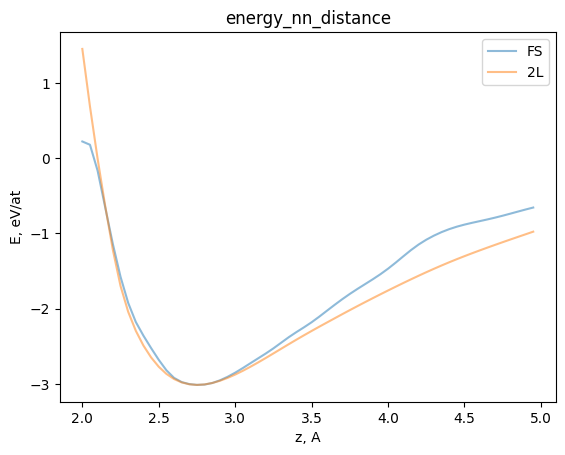

optimization
murnaghan


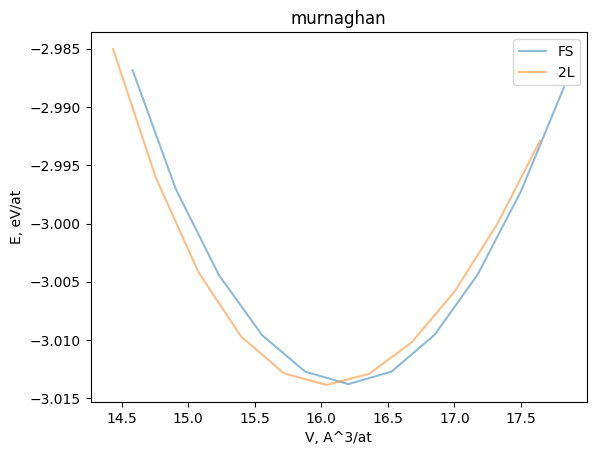

elastic_matrix
Distilled: [[114.7477344    4.28639236  39.93508652   0.           0.
    0.        ]
 [  4.28639236 114.7477344   39.93508652   0.           0.
    0.        ]
 [ 39.93508652  39.93508652  79.51908222   0.           0.
    0.        ]
 [  0.           0.           0.          55.23693716   0.
    0.        ]
 [  0.           0.           0.           0.          55.23693716
    0.        ]
 [  0.           0.           0.           0.           0.
   19.73935439]]
Original: [[110.09440167  -4.17626214  40.34577336   0.           0.
    0.        ]
 [ -4.17626214 110.09440167  40.34577336   0.           0.
    0.        ]
 [ 40.34577336  40.34577336  65.54745975   0.           0.
    0.        ]
 [  0.           0.           0.          57.13910793   0.
    0.        ]
 [  0.           0.           0.           0.          57.13910793
    0.        ]
 [  0.           0.           0.           0.           0.
   12.62132263]]


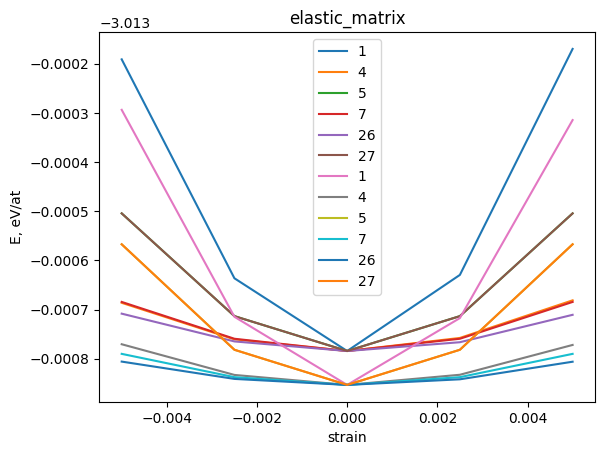

phonons


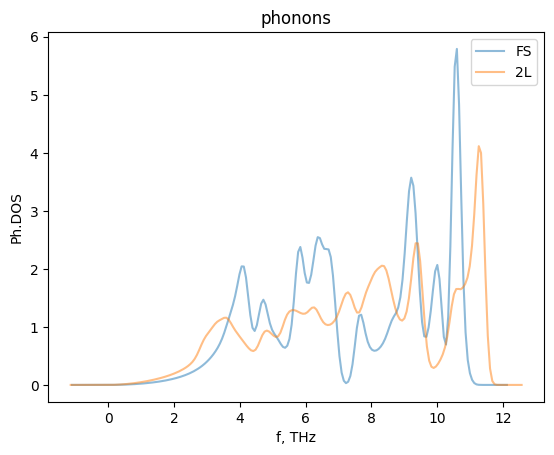

In [97]:
for step_name in pipe.steps.keys():
    step_dist = pipe[step_name]
    step_ft = pipe_ft[step_name]
    print("="*40)
    print(step_name)
    print("="*40)
    if step_name=='elastic_matrix':
        print("Distilled:",step_dist.value['C'])
        print("Original:",step_ft.value['C'])
    try:
        ax=plt.gca()
        step_dist.plot(ax=ax,label='FS', alpha=0.5)
        step_ft.plot(ax=ax,label='2L', alpha=0.5)
        ax.set_title(step_name)
        plt.legend()
        plt.show()
        
    except:
        pass

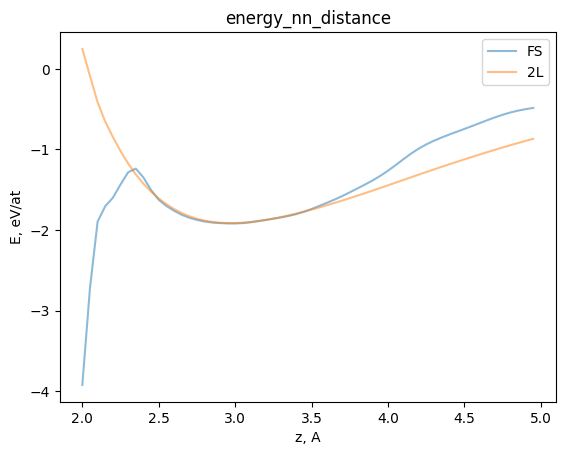

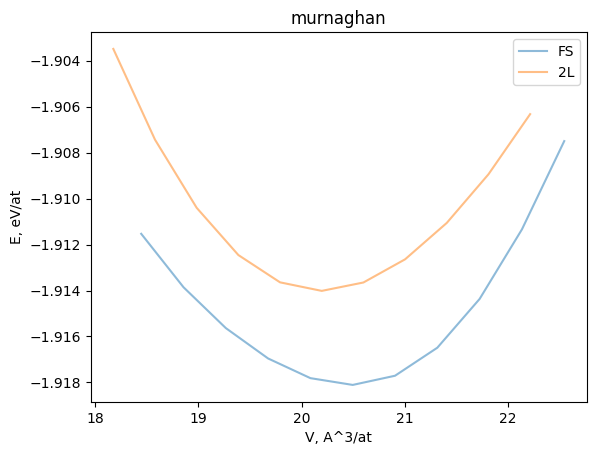

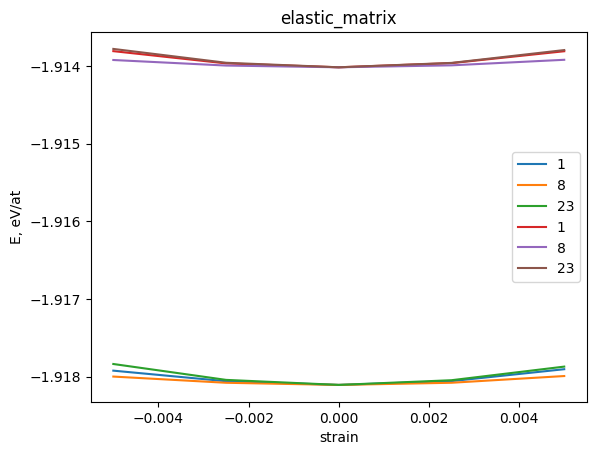

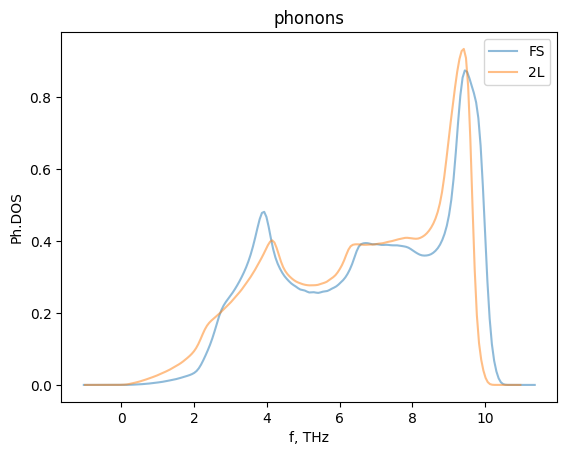

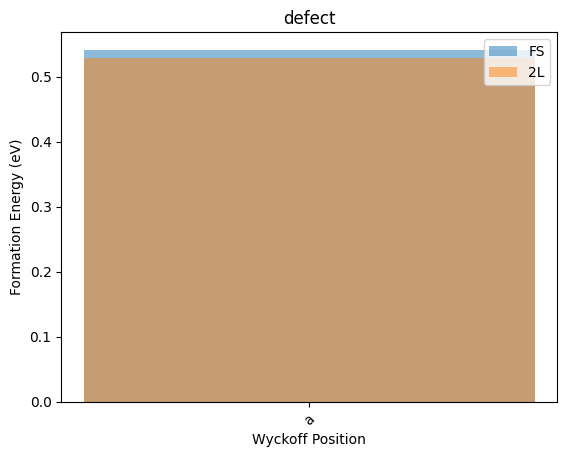

In [83]:
for step_name in pipe.steps.keys():
    step_dist = pipe[step_name]
    step_ft = pipe_ft[step_name]

    try:
        ax=plt.gca()
        step_dist.plot(ax=ax,label='FS', alpha=0.5)
        step_ft.plot(ax=ax,label='2L', alpha=0.5)
        ax.set_title(step_name)
        plt.legend()
        plt.show()
        
    except:
        pass

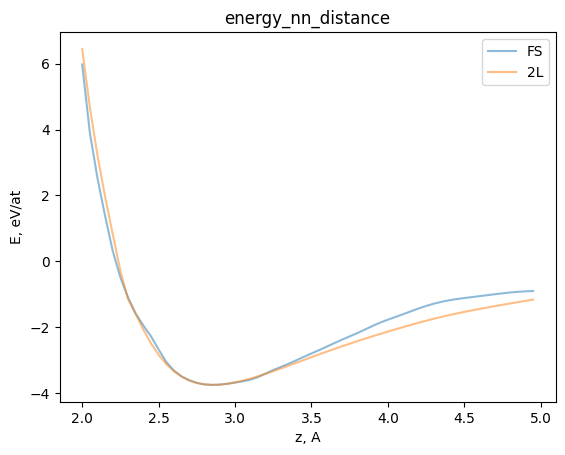

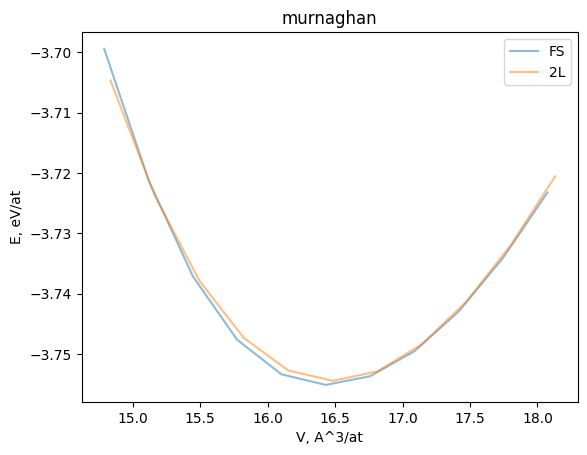

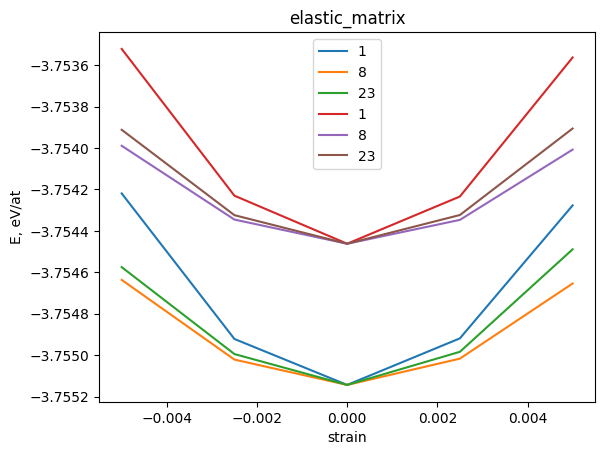

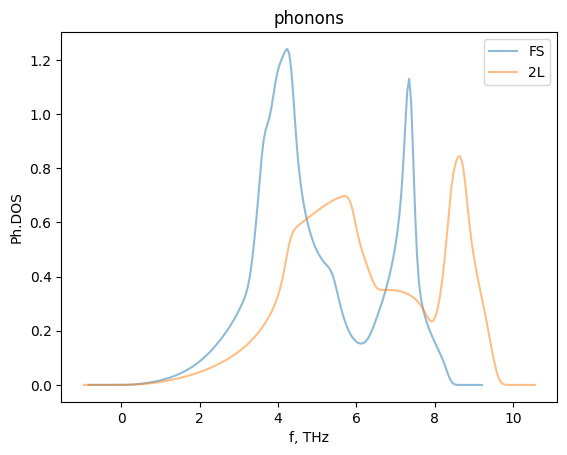

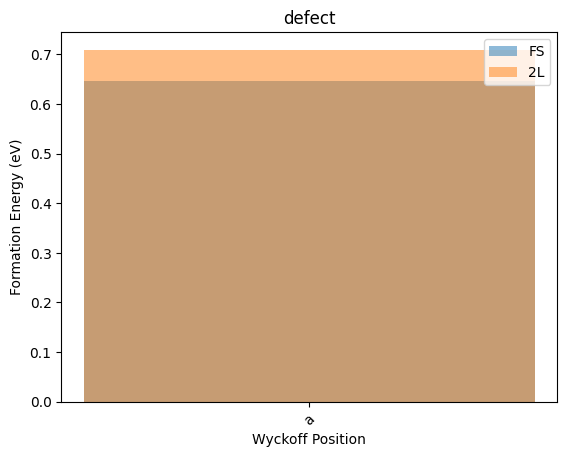

In [75]:
for step_name in pipe.steps.keys():
    step_dist = pipe[step_name]
    step_ft = pipe_ft[step_name]

    try:
        ax=plt.gca()
        step_dist.plot(ax=ax,label='FS', alpha=0.5)
        step_ft.plot(ax=ax,label='2L', alpha=0.5)
        ax.set_title(step_name)
        plt.legend()
        plt.show()
        
    except:
        pass